# Skewness and kurtosis tutorial

## Outline
- Introduction
    - Provide a brief introduction to the importance of understanding data distributions in data science.
    - Explain how skewness and kurtosis are key statistical measures to evaluate the shape of data.
    - Introduce the goal of the tutorial: to help beginners grasp the concepts of skewness and kurtosis.
- What is Skewness?
    - Define skewness and explain its significance in data analysis.
    - Discuss how skewness measures the asymmetry in the data distribution.
- Types of Skewness
    - Explain the three types of skewness: positive skew, negative skew, and zero skew (symmetrical).
    - Provide examples and real-world scenarios for each type.
- Calculating Skewness
    - Offer step-by-step instructions on how to calculate skewness manually. 
    - Introduce the skewness formula and provide examples for practice.
- What is Kurtosis?
    - Define kurtosis and its importance in characterizing data distributions.
    - Discuss how kurtosis measures the tail behavior of data.
- Types of Kurtosis
    - Explain the three types of kurtosis: leptokurtic, mesokurtic, and platykurtic.
    - Provide examples and real-world data representations for each type.
- Calculating Kurtosis
    - Describe the methods to calculate kurtosis manually.
    - Introduce the kurtosis formula and walk through practical examples.
- Interpreting Skewness and Kurtosis
    - Guide readers on how to interpret skewness and kurtosis values.
    - Explain how the results can be used to make data-driven decisions.
- Real-World Applications
    - Provide examples of real-world scenarios where understanding skewness and kurtosis is crucial.
    - Discuss how these statistics are used in fields like finance, healthcare, and social sciences.
- Skewness and Kurtosis in Python
    - Introduction to Python Libraries
        - Introduce popular Python libraries (e.g., NumPy, SciPy, and pandas) for calculating skewness and kurtosis.
        - Explain how to import these libraries and their key functions.
    - Practical Implementation
        - Walk readers through Python code snippets for calculating skewness and kurtosis.
        - Provide sample datasets and show how to apply these calculations.
- Visualization of Skewness and Kurtosis
    - Explain the importance of data visualization in data analysis.
    - Introduce data visualization libraries such as Matplotlib and Seaborn.
    - Creating Visualizations
        - Provide guidance on creating histograms, box plots, and probability plots.
        - Interpret the visualizations in the context of skewness and kurtosis.
- Conclusion


## Introduction

After collecting data and spending hours on cleaning it, you can finally start exploring it! This stage, often called Exploratory Data Analysis (EDA), is perhaps the most important step in a data project. The insights gained from EDA affects everything down the way.

Fill in later, damn it!

## What is skewness?

We see normal distribution everywhere: human body measurements, weights of objects, IQ scores, test results or even at the gym:

![](images/gym.jpeg)

[Source](https://twitter.com/alvinfoo/status/1588664741211570176).

Besides being nature's most favorite distribution, it is universally loved by almost all machine learning algorithms. While some want it to improve and stabilize their performance, some outright refuse to work well with anything other than normal distribution (I am talking to you, linear models). 

So, to satisfy the algorithms' need for normalcy, we need a way to measure how similar or (dissimilar) our own distributions are compared to the perfect bell-shaped curve.

CREATE AN IMAGE THAT SHOWS NORMAL, SKEWED AND KURTOSIS DISTRIBUTIONS

Let's start with the tails. When there is asymmetry between the tails of the normal distribution, giving it a leaned, squished-to-one-side look, we say it is skewed. And you guessed it, we measure the extent of this asymmetry with __skewness__. 

Correctly categorizing and measuring skewness provides insights how values are spread around the mean and influences the choices of statistical techniques and data transformations. For example, highly skewed distributions might benefit from normalization or scaling techniques to make them resemble normal distribution. This would aid in model performance. 

## Types of skewness

There are three types of skewness: positive skewness, negative skewness, and zero skewness.

Let's start with the last one - a distribution with zero skewness:

- Symmetric distribution with values evenly centered around the mean.
- No skew, lean or tail to either side. 
- The mean, median and mode are all at the center point.

In practice, mean, median and mode may not form a perfect overlapping straight line. They may be slightly away from each but the difference would be too small to matter.

In a distribution with positive skewness (right skewed):
- The right tail of the distribution is longer or fatter than the left.
- The mean is greater than the median, and the mode is less than both mean and median.
- Lower values are clustered in the "hill" of the distribution while extreme values are in the long right tail. 
- It is also known as right-skewed distribution.

In a distribution with negative skewness (left skewed):
- The left tail of the distribution is longer or fatter than the right.
- The mean is less than the median, and the mode is greater than both mean and median. 
- Higher values are clustered in the "hill" of the distribution while extreme values are in the long left tail.
- It is also known as left-skewed distribution.

To remember the differences between positive and negative skewness, think of it this way: if you want to increase the mean of a distribution, you should add much higher values than the mean to the distribution. To lower the mean, you should do the opposite - introduce much lower values than the mean to the distribution. So, if the majority of the extreme values is higher than the mean, it is positive skewness because they increase the mean. If the majority of extreme values is smaller than the mean, it is negative skewness because they decrease the mean. 

Here is a summary table on the types of skewness:

DRAW A TABLE IN EXCALIDRAW ON THE TYPES OF SKEWNESS. BE QUICK.

## Calculating skewness in python

There are many ways to [calculate skewness](https://en.wikipedia.org/wiki/Skewness#Other_measures_of_skewness)  but the simplest one is Pearson's second skewness coefficient, also known as median skewness. 

THE FORMULA FOR MEAN/MEDIAN SKEWNESS HERE WITH WORD

Let's do it manually in Python:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Example dataset
diamonds = sns.load_dataset("diamonds")
diamond_prices = diamonds["price"]

mean_price = diamond_prices.mean()
median_price = diamond_prices.median()
std = diamond_prices.std()

skewness = (3 * (mean_price - median_price)) / std

print(
    f"The Pierson's second skewness score of diamond prices distribution is {skewness:.5f}"
)

The Pierson's second skewness score of diamond prices distribution is 1.15189


Another formula highly influenced by the works of Karl Pearson is the moment-based formula to approximate skewness. It is more reliable and given as follows:

THE FORMULA WRITTEN IN WORD 

Here:
- _n_ represents the number of values in a distribution
- x_i denotes each data point

Let's implement it in Python:

In [2]:
def moment_based_skew(distribution):
    n = len(distribution)
    mean = np.mean(distribution)
    std = np.std(distribution)

    # Divide the formula into two parts
    first_part = n / ((n - 1) * (n - 2))
    second_part = np.sum(((distribution - mean) / std) ** 3)

    skewness = first_part * second_part

    return skewness

In [3]:
moment_based_skew(diamond_prices)

1.618440289857168

If you don't want to calculate skewness manually (like me), you can use built-in methods from pandas or scipy:

In [4]:
# Pandas version
diamond_prices.skew()

1.618395283383529

In [5]:
# SciPy version
from scipy.stats import skew

skew(diamond_prices)

1.6183502776053016

While all formulas to approximate skewness return different scores, their differences are too small to be significant or change the categorization of the skew. For example, all methods we have used today leverage different formulas under the hood but the results are very close.

Once you calculate skewness, you can categorize the extent of the skew:
- (-0.5, 0.5) - low or approximately symmetric.
- (-1, -0.5) U (0.5, 1) - moderately skewed.
- Beyond -1 and 1 - Highly skewed.

## What is kurtosis and its types?

While skewness focused on the spread (tails) of normal distribution, kurtosis focuses on the height. It tells us how peaked or flat our normal (or normal-like) distribution is. The term, which means _curved_ or _arched_ from Greek, was first coined by, unsurprisingly, from the British mathematician Karl Pearson (he spent his life studying probability distributions). 

High kurtosis indicates:
- Sharp peakedness in the distribution's center. 
- More values concentrated around the mean than normal distribution. 
- Heavier tails because of a higher concentration of extreme values or outliers in tails.
- Greater likelihood of extreme events.

On the other hand, low kurtosis indicates:
- Flat peak.
- Fewer values concentrated around the mean but still more than normal distribution.
- Lighter tails.
- Lower likelihood of extreme events.


Depending on the degree, distributions have three types of kurtosis:
1. Mesokurtic distribution (kurtosis = 3, excess kurtosis = 0): perfect normal distribution or very close to it.
2. Leptokurtic distribution (kurtosis > 3, excess kurtosis > 0): sharp peak, heavy tails
3. Platykurtic distribution (kurtosis < 3, excess kurtosis < 0): flat peak, light tails

> Note: Excess kurtosis = kurtosis - 3

IMAGE OR IMAGES DEPICTING VARIOUS DISTRIBUTIONS WITH DIFFERENT KURTOSISSSSSSSSS

## Kurtosis in Python

You can calculate kurtosis in Python in the same way as skewness using Pandas or SciPy:

In [6]:
from scipy.stats import kurtosis

kurtosis(diamond_prices)

2.177382669056634

Pandas offers two functions for kurtosis: `kurt` and `kurtosis`. The first one is exclusive to Pandas Series, while you can use the other on DataFrames.

In [7]:
diamond_prices.kurt()

2.17769575924869

In [8]:
# Select numeric features and calculate kurtosis
diamonds.select_dtypes(include="number").kurtosis()

carat     1.256635
depth     5.739415
table     2.801857
price     2.177696
x        -0.618161
y        91.214557
z        47.086619
dtype: float64

Again, the numbers differ for the distribution because Pandas and SciPy use different formulas.

If you want a manual calculation of kurtosis, you can use the following formula:

THE FORMULA TO CALCULATE KURTOSIS

Here:
- _n_ represents the number of observations in the dataset
- x_i denotes each individual data point

We will implement the formula inside a function again:

In [9]:
def moment_based_kurtosis(distribution):
    n = len(distribution)
    mean = np.mean(distribution)
    std = np.std(distribution)

    kurtosis = (1 / n) * sum(((distribution - mean) / std) ** 4) - 3

    return kurtosis

In [10]:
moment_based_kurtosis(diamond_prices)

2.1773826690576463

And we find out that diamond prices have an excess kurtosis of 2.18, which means if we plot the distribution, it will have a sharper peak than a normal distribution.

So, let's do that!

## Visualizing skewness and kurtosis in Python

One of the best visuals to see the shape and thus, the skewness and kurtosis of distributions is a __kernel density estimate (KDE)__ plot. It is available to use through Seaborn:

Text(0.5, 0, 'Price ($)')

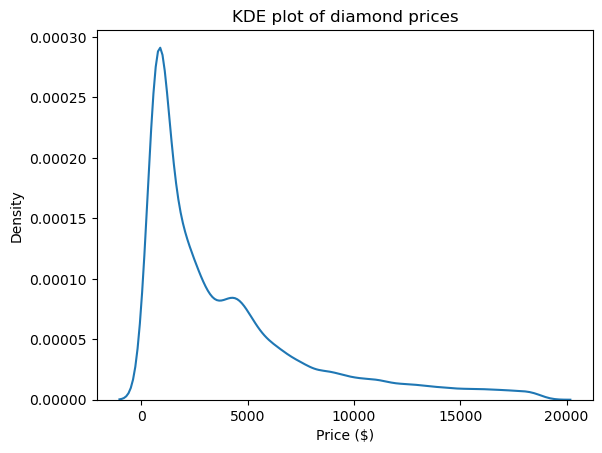

In [14]:
import matplotlib.pyplot as plt

sns.kdeplot(diamond_prices)

plt.title("KDE plot of diamond prices")
plt.xlabel("Price ($)")

This plot is in accordance with the numbers we saw up to this point: the distribution has a long right tail, indicated a positive skewness and it has a very sharp peak which corresponds with high kurtosis. 

KDE isn't the only plot to see the shape. We can use histograms as well:

Text(0.5, 1.0, 'A histogram of the carat of diamonds')

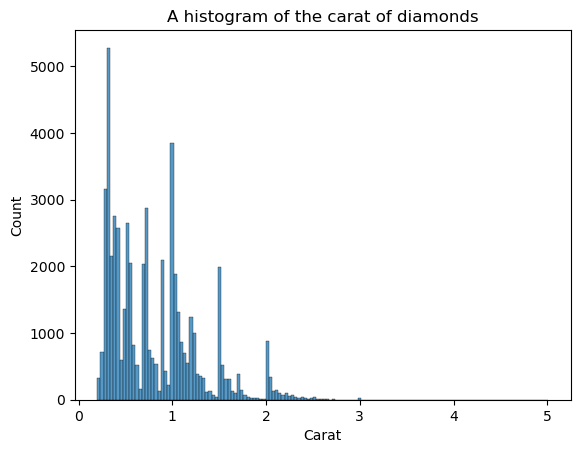

In [16]:
sns.histplot(diamonds["carat"])

plt.xlabel("Carat")
plt.title("A histogram of the carat of diamonds")

The disadvantage of histograms is that you have to choose the number of bins (the count of bars) yourself. Here, there are too many bars creating noise in the visual - we can't clearly define the shape. So, let's decrease the number of bins:

Text(0.5, 1.0, 'A histogram of the carat of diamonds')

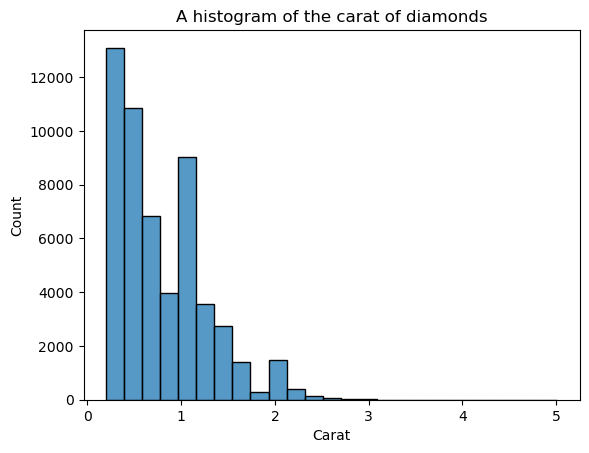

In [18]:
sns.histplot(diamonds["carat"], bins=25)

plt.xlabel("Carat")
plt.title("A histogram of the carat of diamonds")

Now, the shape is more well-defined but we can improve it more. By setting `kde=True` inside `histplot`, we can plot a KDE of the distribution on top of the bars:

Text(0.5, 1.0, 'A histogram of the carat of diamonds')

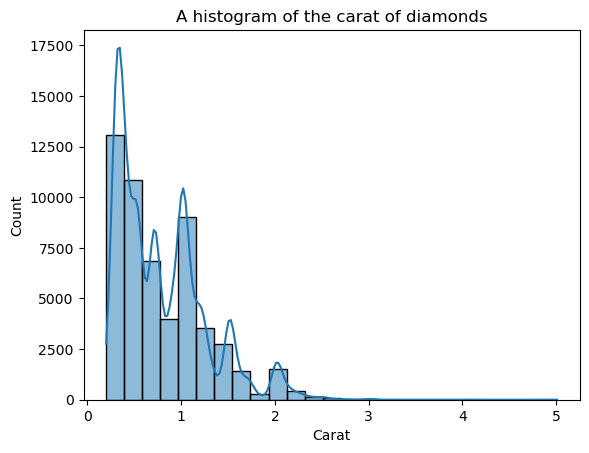

In [19]:
sns.histplot(diamonds["carat"], bins=25, kde=True)

plt.xlabel("Carat")
plt.title("A histogram of the carat of diamonds")

The overlayed KDE looks jagged, not the smooth curve that enables us to see the general shape. The reason for the fluctuations is that the carat distribution is naturally spiky and far from the normal distribution.

But, we can decrease KDE plot's sensitivity to these fluctuations by adjusting the bandwidth. This is done using the `bw_adjust` parameter, which defaults to 1:

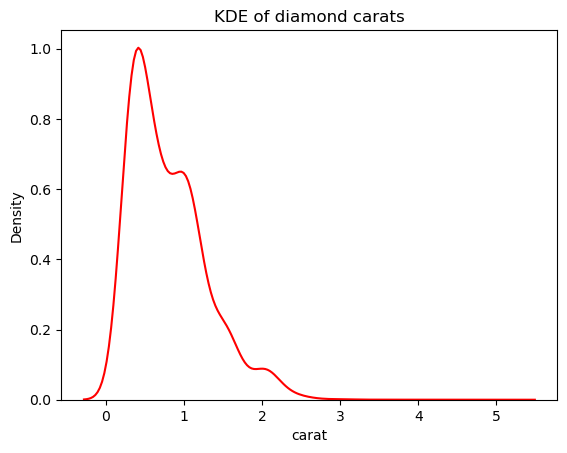

In [25]:
sns.kdeplot(diamonds["carat"], bw_adjust=3, color="red")

plt.title("KDE of diamond carats");

This version looks much less spiky than the overlayed KDE plot. To use adjust the KDE bandwidth when using a histogram overlayed with a KDE, you can use the `kde_kws` parameter:

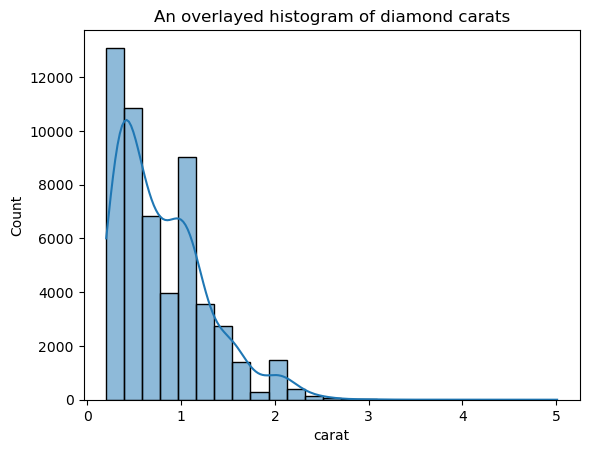

In [28]:
sns.histplot(
    diamonds["carat"],
    kde=True,
    kde_kws=dict(bw_adjust=3),
    bins=25,
)

plt.title("An overlayed histogram of diamond carats");

`kde_kws` accepts any parameter that is acceptable by `kdeplot` function that controls the KDE computation.

One trick you can use when plotting KDEs is to remove everything except the KDE line. Since the main point of a KDE is to see the distribution shape, other details of the plot like the axis ticks, the spines and labels are sometimes unnecessary:

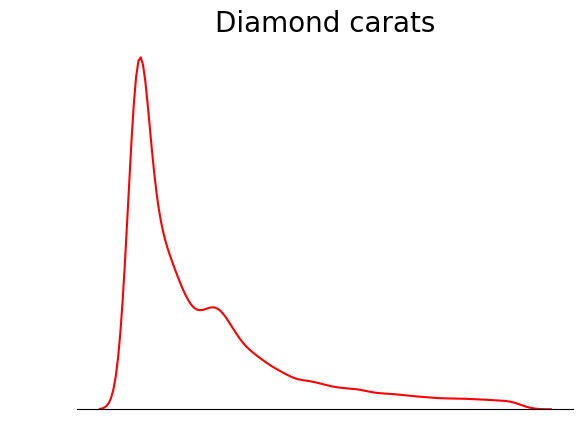

In [36]:
sns.kdeplot(diamond_prices, color="red")

# Remove the spine from three sides
sns.despine(top=True, right=True, left=True)
# Remove the ticks and ticklabels by making them white (background color)
plt.tick_params(which="both", color="white", labelcolor="white")
# Remove the lables
plt.ylabel("")
plt.xlabel("")

# Set a title
plt.title("Diamond prices", fontdict=dict(fontsize=20));

This plot is much tidier. You can further improve the plot by adding lines to denote the position of mean, median and mode:

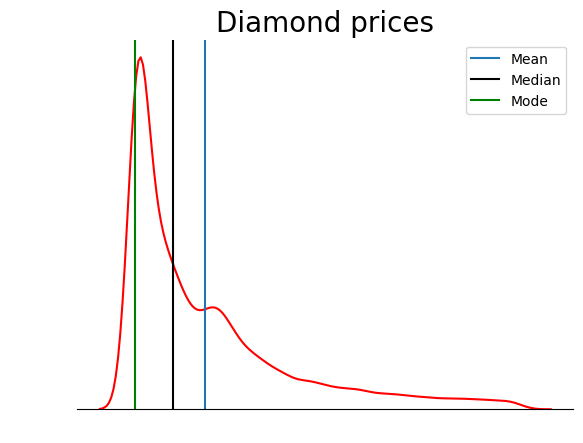

In [66]:
sns.kdeplot(diamond_prices, color="red")

# Remove the spine from three sides
sns.despine(top=True, right=True, left=True)
# Remove the ticks and ticklabels by making them white (background color)
plt.tick_params(which="both", color="white", labelcolor="white")
# Remove the lables
plt.ylabel("")
plt.xlabel("")

# Set a title
plt.title("Diamond prices", fontdict=dict(fontsize=20))

# Find the mean, median, mode
mean_price = diamonds["price"].mean()
median_price = diamonds["price"].median()
mode_price = diamonds["price"].mode().squeeze()

# Add lines at the position of mean, median, mode
plt.axvline(mean_price, label="Mean")
plt.axvline(median_price, color="black", label="Median")
plt.axvline(mode_price, color="green", label="Mode")

plt.legend();

This plot verifies what we discussed in the types of skewness section: in a positively skewed distribution mean (blue) is higher than median (black) and mode (green) is lower than both mean and median. 

## Conclusion